<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1.3 Calculus: Meaning and Notation

In [ ]:

# Your code here


### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:

# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

In [ ]:

# Your code here


### 1.8 Some things to note about the code

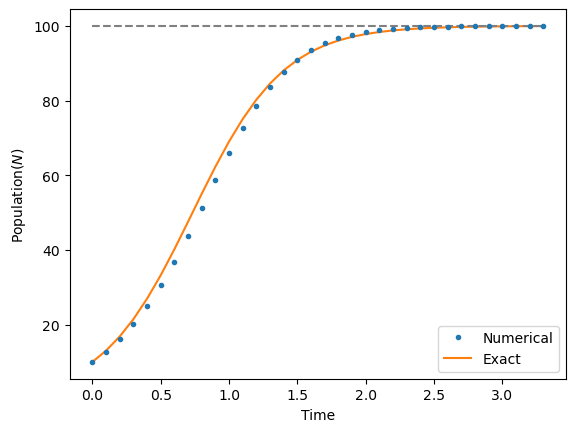

In [5]:
def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2               

dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    try:
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

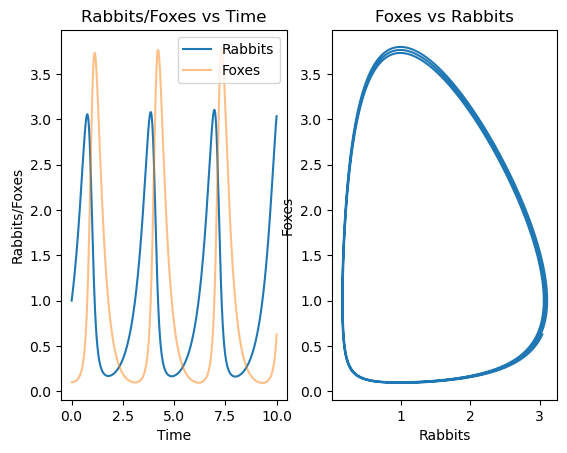

In [6]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []

def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

   
    foxes += dfoxes_dt(rabbits, foxes)*dt

   
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break


data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()


ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

### 2.3 Some things to note about the code

In [ ]:

# Your code here


## 3 Hello SciPy

### 3.1 SciPy odeint()

In [5]:
from scipy.integrate import odeint

### 3.2 Radioactivity

In [ ]:
max_time = 0.05
dt = .001
decay_constant = 142       
N0 = 1                     


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  
               func=dNdt,                
               t=all_time,               
               args=(decay_constant,)    
               )

### 3.3 Logistic Equation

In [6]:
def dNdt(N, time, rate, carrying_capacity):
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

### 3.4 Predator-Prey

In [7]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

def dy_dt(y, t):

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)


results = odeint(y0=[rabbits0, foxes0],         
                 func=dy_dt,                    
                 t=data['time']                 
                 )

data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

## Exercise 1 :  The Lorentz Attaractor

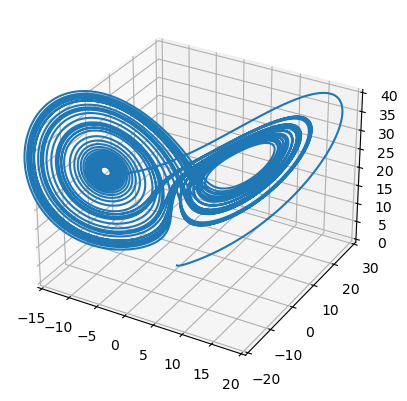

In [3]:
max_time = 50
dt = 0.001
x0, y0, z0 = 0,1,0
time, x, y, z = 0, x0, y0, z0
data = []

def dx(x,y,z):
    s = 10
    return s*(y-x)

def dy(x,y,z):
    p = 28
    return x*(p-z)-y

def dz(x,y,z):
    b = 8/3
    return x*y-b*z

while True:
    data.append([time, x, y, z])
    
    x_new = x + dx(x,y,z)*dt
    y_new = y + dy(x,y,z)*dt
    z_new = z + dz(x,y,z)*dt
    
    x = x_new
    y = y_new
    z = z_new
    
    time += dt
    
    if time> max_time:
        break

data = np.array(data)
data = {
    'time': data [:,0],
    'x': data[:, 1],
    'y': data[:,2],
    'z': data [:,3]
}

ax = plt.axes(projection='3d') 
ax.plot3D(data['x'], data['y'], data['z']) 
ax.set_xlim(-15, 20) 
ax.set_ylim(-20, 30) 
ax.set_zlim(0, 40) 
plt.show()    